In [28]:
import tensorflow as tf

In [29]:
 print(tf.__version__)

2.4.1


In [30]:
from sklearn.datasets import load_breast_cancer

In [31]:
data=load_breast_cancer()

In [32]:
import pandas as pd


In [33]:
print(data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [34]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [35]:
data.data.shape

(569, 30)

In [36]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [37]:
data.filename

'/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/breast_cancer.csv'

In [38]:
data.target.shape

(569,)

In [39]:
 type(data)

sklearn.utils.Bunch

In [40]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test= train_test_split(data.data,data.target,test_size=0.33)

In [43]:
N,D=X_train.shape

In [44]:
print(N)

381


In [45]:
D

30

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [48]:
print(X_train)

[[-0.44648875  0.14689389 -0.4499642  ... -0.56883625 -0.37786165
  -0.36325911]
 [ 0.26347165 -0.39843349  0.22839285 ...  0.78024155  0.80707129
  -0.69107041]
 [-1.19151947 -0.84268727 -1.17004724 ... -0.73245575 -0.67531396
   0.40446753]
 ...
 [-0.77153085  1.83693868 -0.80814664 ... -1.39543539 -0.11129237
  -0.72294834]
 [ 0.3404553   2.66903306  0.49899204 ...  1.80789728  1.90423143
   2.99773654]
 [-0.13855412 -1.15295975 -0.15953484 ...  0.21495632  0.0967617
  -0.63156496]]


In [49]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape=(D,),activation='sigmoid'))

In [50]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [51]:
r = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=100)
# Evaluate the model
print("Train score:",model.evaluate(X_train,y_train))
print("Test score:",model.evaluate(X_test,y_test))

Epoch 1/100
12/12 [==============================] - 0s 15ms/step - loss: 0.3924 - accuracy: 0.8380 - val_loss: 0.3880 - val_accuracy: 0.8670
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3595 - accuracy: 0.8556 - val_loss: 0.3643 - val_accuracy: 0.8723
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3499 - accuracy: 0.8604 - val_loss: 0.3441 - val_accuracy: 0.8777
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3746 - accuracy: 0.8736 - val_loss: 0.3257 - val_accuracy: 0.8777
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.2969 - accuracy: 0.9054 - val_loss: 0.3100 - val_accuracy: 0.8777
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3048 - accuracy: 0.8865 - val_loss: 0.2955 - val_accuracy: 0.8883
Epoch 7/100
12/12 [==============================] - 0s 18ms/step - loss: 0.3025 - accuracy: 0.9100 - val_loss: 0.2831 - val_accuracy: 0.8883
Epoch 8/100

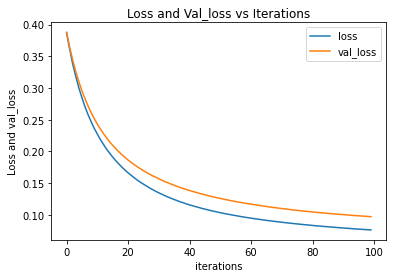

In [52]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("Loss and Val_loss vs Iterations")
plt.xlabel('iterations')
plt.ylabel('Loss and val_loss')
plt.legend();

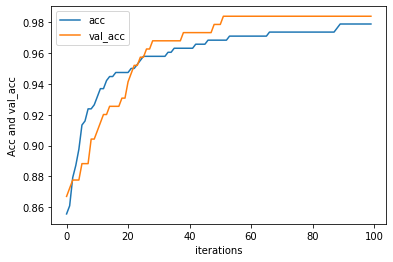

In [53]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.xlabel('iterations')
plt.ylabel('Acc and val_acc')
plt.legend();

In [54]:
y_pred = model.predict(X_test)
print(y_pred)

[[3.2815933e-02]
 [3.8986465e-01]
 [9.8611462e-01]
 [9.6616203e-01]
 [2.6739925e-02]
 [9.9598604e-01]
 [9.2888308e-01]
 [7.3519647e-03]
 [1.2259326e-04]
 [9.2061448e-01]
 [9.9719524e-01]
 [9.9351948e-01]
 [2.6250792e-01]
 [7.8686726e-01]
 [9.9965781e-01]
 [6.5176183e-01]
 [9.7612917e-01]
 [1.6054731e-09]
 [9.4913292e-01]
 [9.7299904e-01]
 [1.6692281e-04]
 [8.3999372e-01]
 [9.4542736e-01]
 [8.9591742e-04]
 [8.0047154e-01]
 [9.9109030e-01]
 [9.8781615e-01]
 [8.8931382e-01]
 [7.7515441e-01]
 [9.9794596e-01]
 [8.6836708e-01]
 [7.6335669e-04]
 [9.9882841e-01]
 [1.1543334e-03]
 [9.8945779e-01]
 [9.8640108e-01]
 [9.5643437e-01]
 [7.7016258e-01]
 [2.1267542e-01]
 [9.9673545e-01]
 [2.4052262e-03]
 [1.8020064e-01]
 [9.9959695e-01]
 [9.7079062e-01]
 [9.8730797e-01]
 [1.2086928e-03]
 [2.4710268e-02]
 [9.9770689e-01]
 [9.5723790e-01]
 [4.6695769e-02]
 [4.2200089e-04]
 [8.4820563e-01]
 [9.8493230e-01]
 [5.6821799e-01]
 [9.2739224e-01]
 [1.1811256e-03]
 [4.2188931e-01]
 [8.4969401e-04]
 [9.8673558e-0